In [49]:
import networkx as nx
import numpy as np

In [50]:
# Definitions
G = nx.Graph()
T0 = [0,2,4,5,3,1]
edges = [(0,1),(0,2),(1,2),(1,3),(2,4),(2,5)]
G.add_edges_from(edges)

In [51]:
# Calcule de la distance d(vk) pour chaque nœud vk
def calculate_distance(graph, layout):
    distances = {}
    for node in graph.nodes():
        neighbors = list(graph.neighbors(node))
        neighbors.append(node)
        nb = len(neighbors)
        distance_vk = 1/nb * sum(layout.index(neighbor) for neighbor in neighbors)
        distances[node] = distance_vk
    return distances

# Fonction pour transformer le tableau Ti en Ti+1
def transform_layout(graph, layout):
    distances = calculate_distance(graph, layout)
    sorted_nodes = sorted(distances, key=distances.get)
    return sorted_nodes

In [53]:
def arc_diagram_algorithm(graph, initial_layout, max_iterations=100, convergence_threshold=0.001):
    layout = initial_layout.copy()
    for i in range(max_iterations):
        new_layout = transform_layout(graph, layout)
        distances = calculate_distance(graph, new_layout)
        layout = new_layout
        # Ajoutez ici votre critère de convergence
        # (par exemple, en vérifiant si les distances ont convergé)
        if max(distances.values()) - min(distances.values()) < convergence_threshold:
            break
    return layout

In [54]:

Tf = arc_diagram_algorithm(G, T0)

print("Résultat final du diagramme en arcs:", Tf)

Résultat final du diagramme en arcs: [4, 5, 2, 0, 1, 3]


In [55]:
import matplotlib.pyplot as plt


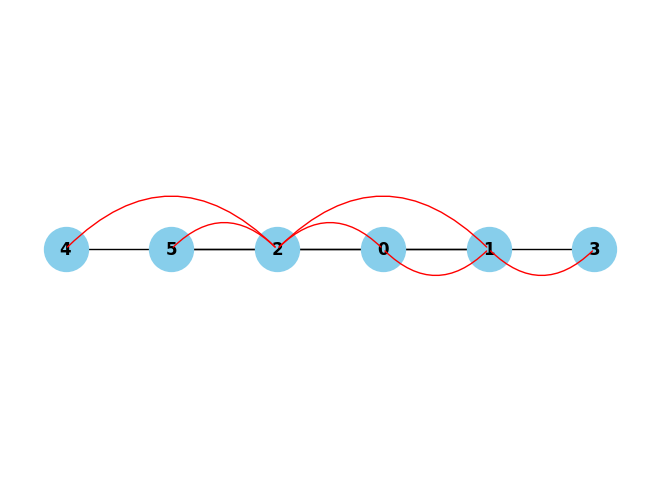

In [56]:
# Draw the arc diagram
pos = {node: (index, 0) for index, node in enumerate(Tf)}
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=1000)
for edge in G.edges():
        pos_edge = np.array([pos[edge[0]], pos[edge[1]]], dtype=float)
        connectionstyle = f'arc3,rad={0.5}' 
        plt.annotate("", xy=pos_edge[1], xytext=pos_edge[0], arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle, color='red'))
plt.show()